<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-ML/blob/main/AA_2_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exercise 1

1) Load the breast_cancer dataset from skelarn (from sklearn.datasets import load_breast_cancer). Split the dataset into training and test datasets. Scale the dataset using minmaxscaler. Use KNeighborsClassifier classifier and report the score on the test dataset.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier


In [2]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=4)

In [3]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
clf =  KNeighborsClassifier(n_neighbors=3).fit(X_train_scaled, y_train) 

X_test_scaled = scaler.transform(X_test)
print("MinMaxScaled Test score: {:.4f}".format(clf.score(X_test_scaled, y_test)))

MinMaxScaled Test score: 0.9860


2) Repeat Step 1 using pipelines and report the score.

In [4]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=3))
pipe.fit(X_train, y_train)
print("Train score: {:.4f}".format(pipe.score(X_train, y_train)))
print("Test score: {:.4f}".format(pipe.score(X_test, y_test)))

Train score: 0.9812
Test score: 0.9860


3) Use the pipeline object from Step 2 and make a grid search on parameter of number of neighbor. 

In [5]:
from sklearn.model_selection import GridSearchCV

Neigh_pipe = make_pipeline(MinMaxScaler(), KNeighborsClassifier())
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'kneighborsclassifier__n_neighbors':  np.arange(1, 30, 2)}
grid = GridSearchCV(Neigh_pipe, param_grid=param_grid, cv=10,return_train_score=True)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.962
best parameters: {'kneighborsclassifier__n_neighbors': 7}
test-set score: 0.993


4)	Import bike_day_raw.csv. Create a pipeline using ColumnTransformer, Scaling, and KNeighborsRegressor.

- Use `from sklearn.neighbors import KNeighborsRegressor'
- You need to split the data into X and y. 
- Check the data shape
- Check the data types
- Print the column names of the data frame
- Create a scatterplot of each feature against the target variable (you may use clues our previous labs to do that)
- Create alist of features that are numeric and not numeric
- Create a pipeline of imputer and standard scaler for the numeric features
- Create a column transformer which uses the pipeline you created for numeric features and a onehotencoder for the non-numeric features
- You can create your column transformer in different ways
- Finally create a pipeline of column transformer and kNeighborsRegressor
- Split your data into train and test datasets
- Report the score on the test dataset



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import os
for Dir, Folders, Files in os.walk(os.getcwd()):
  for File in Files:
    if File == 'bike_day_raw.csv':
      Path = os.path.join(Dir, File)
      print(Path)

/content/drive/MyDrive/Colab Datasets/bike_day_raw.csv
/content/drive/Othercomputers/My MacBook Pro/GitHub/Magnimind Eski Projeler/Romuald Francis Yang repos/Magnimind DS/datasets/bike_day_raw.csv
/content/drive/Othercomputers/My MacBook Pro/GitHub/Magnimind-ML/Assignments, Datasets and Solutions-2/bike_day_raw.csv
/content/drive/Othercomputers/My MacBook Pro/GitHub/Magnimind-ML/Assignments, Datasets and Solutions-3/bike_day_raw.csv
/content/drive/Othercomputers/My MacBook Pro/GitHub/Magnimind-ML/Module-2-St/bike_day_raw.csv
/content/drive/Othercomputers/My MacBook Pro/GitHub/Magnimind-ML/Module-3-St/bike_day_raw.csv
/content/drive/Othercomputers/My MacBook Pro/GitHub/Assignments, Datasets and Solutions-20230327/bike_day_raw.csv


In [22]:
import pandas as pd
df = pd.read_csv(Path)

In [23]:
X = df.drop('cnt', axis=1)
y = df.iloc[:, 10]

In [24]:
df.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [25]:
df.dtypes

season          int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   mnth        731 non-null    int64  
 2   holiday     731 non-null    int64  
 3   weekday     731 non-null    int64  
 4   workingday  731 non-null    int64  
 5   weathersit  731 non-null    int64  
 6   temp        731 non-null    float64
 7   atemp       731 non-null    float64
 8   hum         731 non-null    float64
 9   windspeed   731 non-null    float64
 10  cnt         731 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB


In [27]:
X.columns

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [30]:
import numpy as np
import matplotlib.pyplot as plt

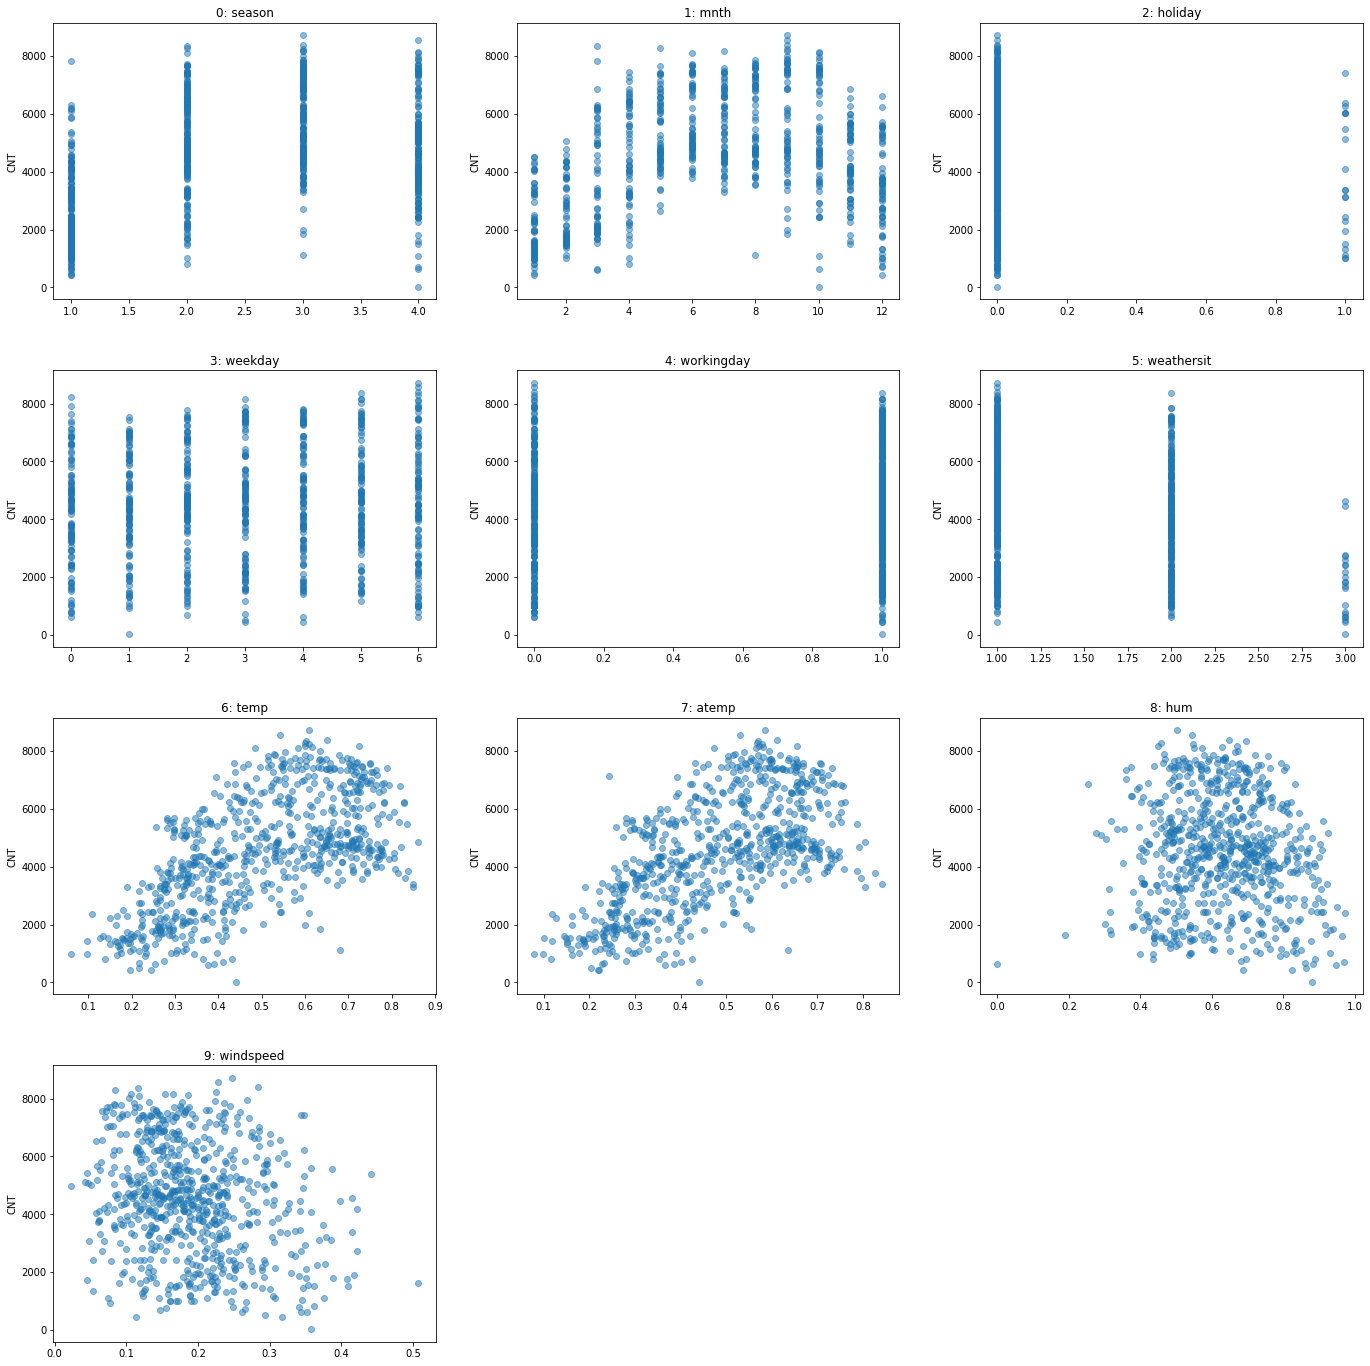

In [33]:
fig, axes = plt.subplots(4, 3, figsize=(20,20))
fig.tight_layout(pad=5.0)

for i, ax in enumerate(axes.ravel()):
  if i > 9:
    ax.set_visible(False)
    continue
  ax.plot(X.iloc[:, i], y, 'o', alpha=0.5)
  ax.set_title('{}: {}'.format(i, X.columns[i]))
  ax.set_ylabel('CNT')

In [ ]:
from sklearn.compose import StandardScaler, OneHotEncoder
